# Project Problem Statement

### Problem Statement

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Dictionary

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status: Flag indicating if the Visa was certified or denied

# Importing Necessary Libraries

In [1]:
# Importing and manipulating data
import pandas as pd
import numpy as np

# Visualiztion Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To get diferent metric scores
from sklearn import metrics

# Libraries to build different models and data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Performance Metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# ignore warnings due to package's version
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Projects/Module3-AdvancedMachineLearning/EasyVisa.csv")

In [4]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

# Data Overview and Imputation

In [5]:
# Displaying top 5 dataset rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# Displaying last 5 dataset rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
# Displaying number of rows and columns for dataset
df.shape

(25480, 12)

In [8]:
# Displaying column info in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# Converting all the object type columns to category to save disk space

for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [10]:
# Displaying column info after converting object columns to categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


**Observation**

1. All variables expect prevailing wage, no of employees and year of establishment are numeric in nature.
2. All the variables have 25480 non null values.
3. Status of the visa will not depend on the Case Id Variable so we wil be dropping it.

In [11]:
# Checking null values
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


**Observation**

There are no null values in the data for any column.

In [12]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

**Observation**

There are no duplicate values present in the data.

In [13]:
# Statistical Summary of dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV9999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# storing all the case ids which have negative number of employees to check after treating the negative values
negativeCaseIds = df[df['no_of_employees'] < 0]['case_id'].tolist()
# checking all the negative values of no of employees as they cannot be negative
df[df['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [15]:
# Finding the right strategy and imputing the no of employees column

median_value = df[df['no_of_employees'] >= 0]['no_of_employees'].median()
print("Median Value of employees", median_value)

# Imputing the no of employees column with the absolute value as the median value is too high
df['no_of_employees'] = df['no_of_employees'].abs()

# Displaying the data where the previous value of no of employees column was negative
filtered_df = df[df['case_id'].isin(negativeCaseIds)]
filtered_df


Median Value of employees 2112.0


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,11,2009,Midwest,38457.5100,Year,Y,Certified


In [16]:
# Checking for the case_id column if all the values are unique before dropping column
print(df['case_id'].nunique())

# Dropping Id Column as it will not be used for analysis
df.drop(['case_id'], axis=1, inplace=True)

25480


In [17]:
# Statistical summary of data after imputation
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.089207,22877.917453,11.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation**

1. **continent** - There are a total of 6 continents in the dataset where Employees from continent Asia are the highest.
2. **education_of_employee** - ~40% of the employees who are coming to the US have a Bachelor's degree.
3. **has_job_experience** - ~58% have a job experience.
4. **requires_job_training** - ~88% do require a job training.
5. **no_of_employees** - Minimum value is 11 and Maximum is 6,02,609. 75% of the employers have ~3500 employees. This column has outliers but we wont be treating them as the data contains some big employer's which is normal.
6. **yr_of_estab** - Range of year of establishment of employers is between 1800 and 2016.
7. **region_of_employment** - out of the 5 regions, NorthEast region has ~28% of the employees.
8. **prevailing_wage** - Mean wage = ~74000$ , Median Wage = ~70000$
9. **unit_of_wage** - ~90% of the employees are on yearly wage.
10. **full_time_position** - ~89% of people have full time position.
11. **case_status** - ~66% of the empoyee visa were Certified.

# EDA Analysis

## Common Functions

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

#### Observation on Continent

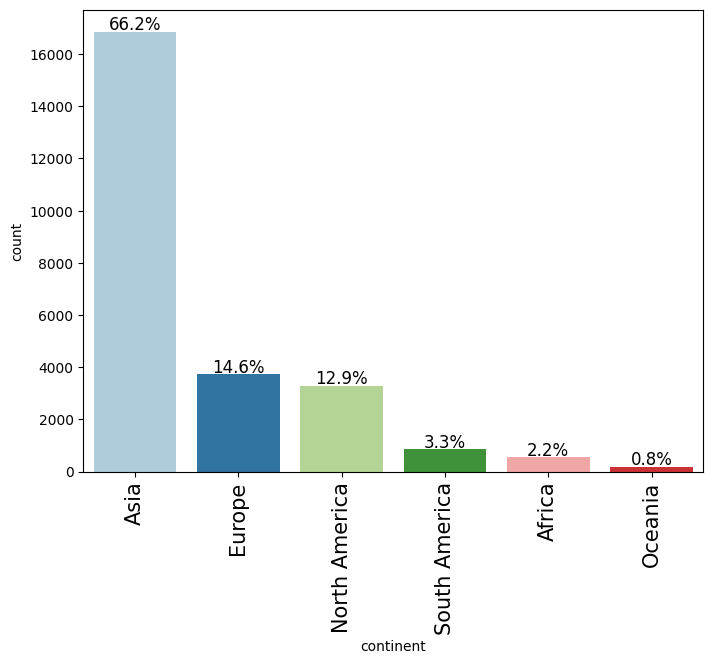

In [22]:
labeled_barplot(df, "continent", perc=True)

**Observation**

1. Asia has the most no of employee visa applications, followed by Europe and North America.

#### Observation on education_of_employee

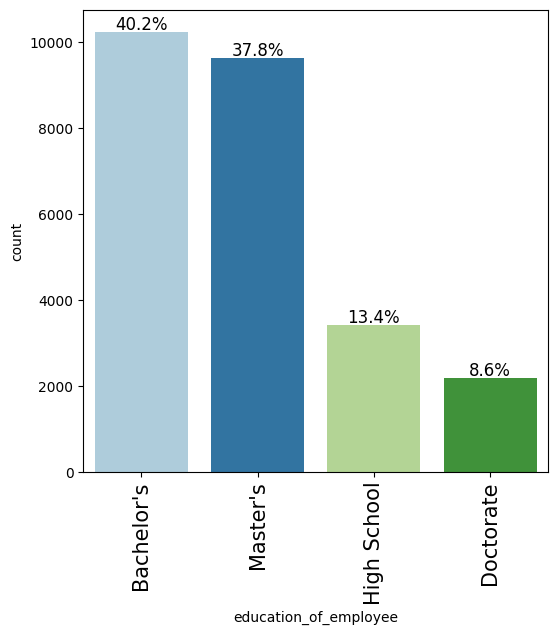

In [23]:
labeled_barplot(df, "education_of_employee", perc=True)

**Observation**

1. ~80% of Visa applications have either a Bachelor's degree or Master's degree.

#### Observation on has_job_experience

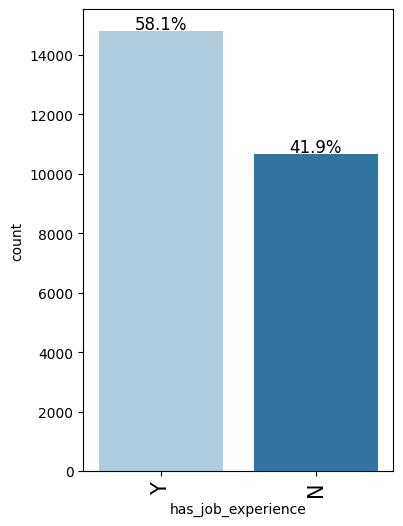

In [24]:
labeled_barplot(df, "has_job_experience", perc=True)

**Observation**

1. 58% of the employees for visa application have previous job experience.

#### Observation on requires_job_training

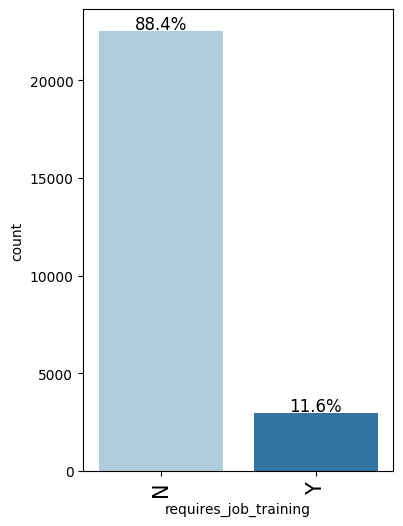

In [25]:
labeled_barplot(df, "requires_job_training", perc=True)

**Observation**

1. Only 11.5% of the applications for isa require job training.  

#### Observation on no_of_employees

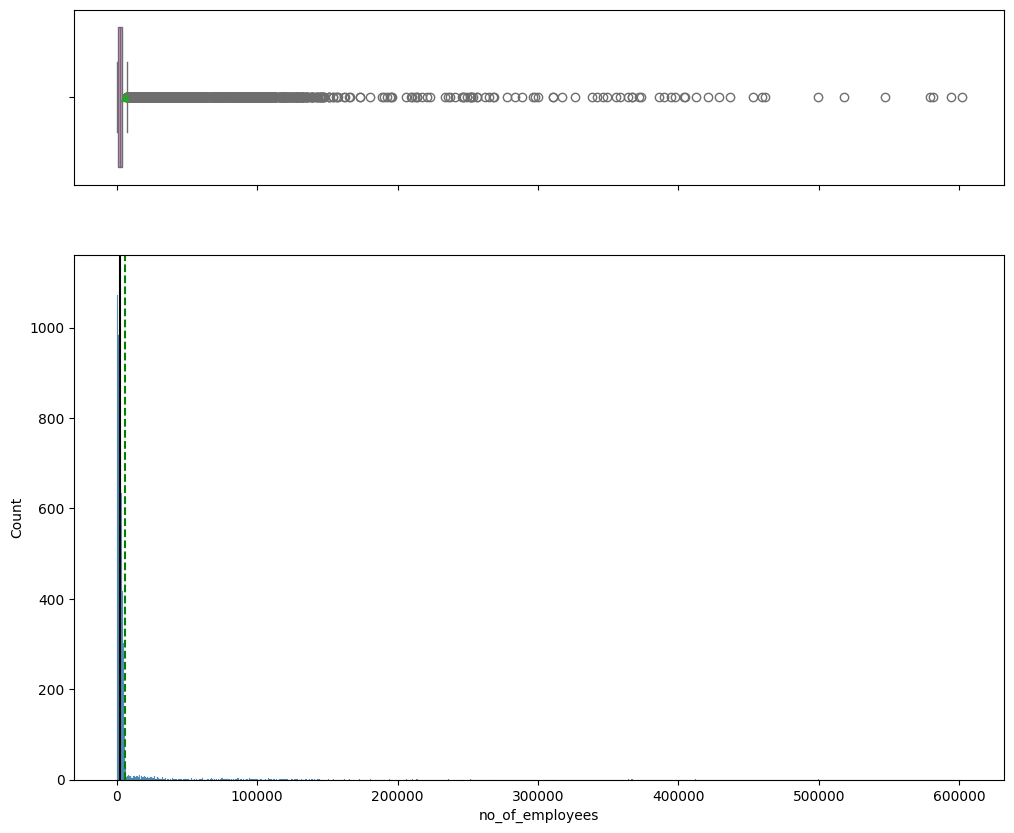

In [26]:
histogram_boxplot(df, "no_of_employees")

**Observation**

1. The data for no of employees is highly skewed towards right.
2. The data contains companies which can vary in size and the max for this column tells that some companies are big companies as well.

#### Observation on yr_of_estab

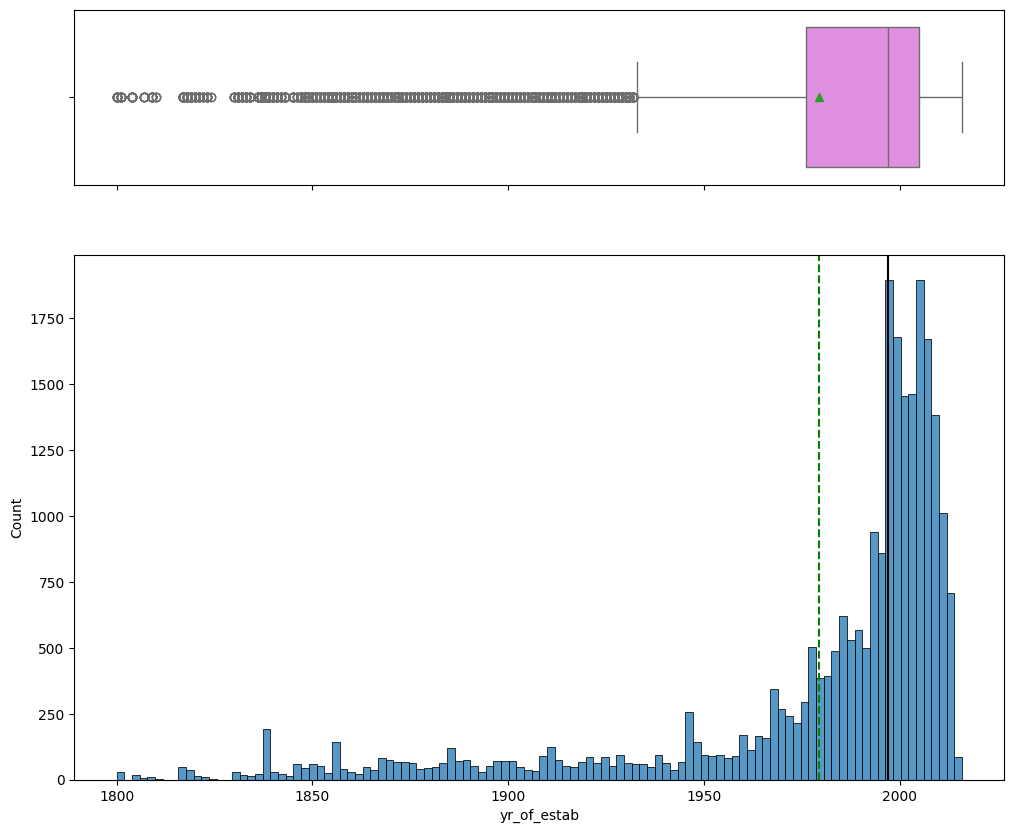

In [27]:
histogram_boxplot(df, "yr_of_estab")

**Observation**

1. Left skewed data which tells that the employer were established after 1975.
2. 50% of the employers were established after ~1990s.

#### Observation on region_of_employment

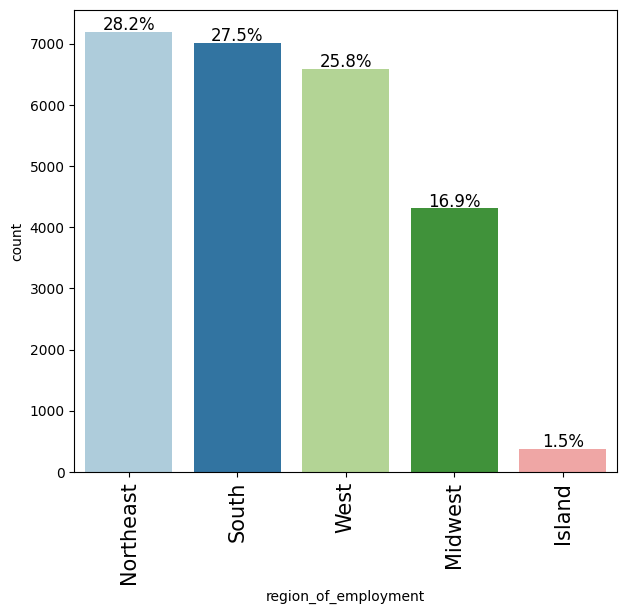

In [28]:
labeled_barplot(df, "region_of_employment", perc=True)

**Observation**

1. Top 3 region of employment include NorthEast, South and West.

#### Observation on prevailing_wage

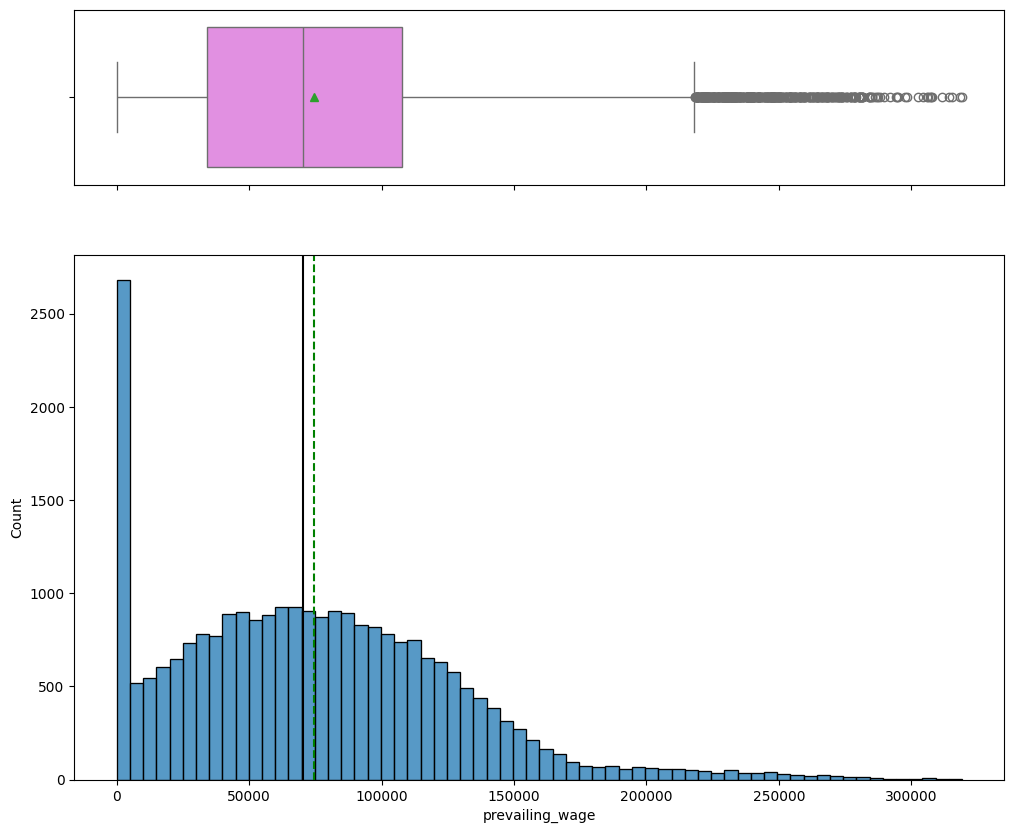

In [29]:
histogram_boxplot(df, "prevailing_wage")

**Observation**

1. Data is skewed to the right.
2. Many applications have high income individuals.
3. Since there is column unit of wage the data might have hourly/weekly/Monthly/Yearly wages.

#### Observation on unit_of_wage

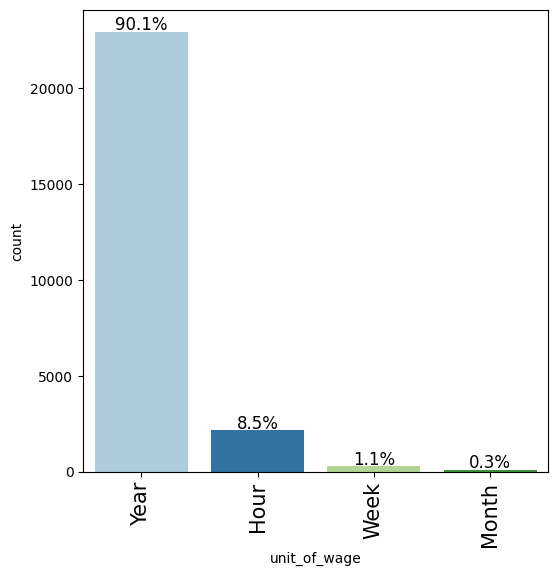

In [30]:
labeled_barplot(df, "unit_of_wage", perc=True)

**Observation**

1. Most of the wages mentioned in the dataset are yearly or Hourly.

#### Observation on full_time_position

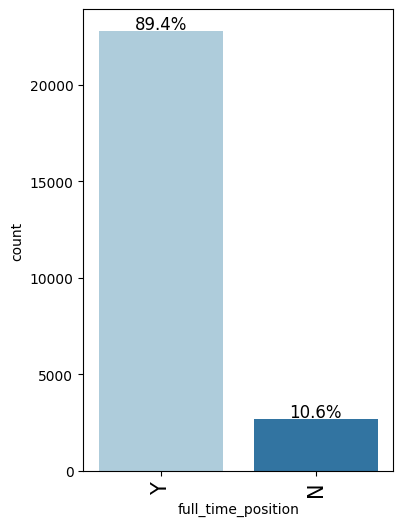

In [31]:
labeled_barplot(df, "full_time_position", perc=True)

**Observation**

1. 89% of the visa applicants are full time employees.

#### Observation on case_status

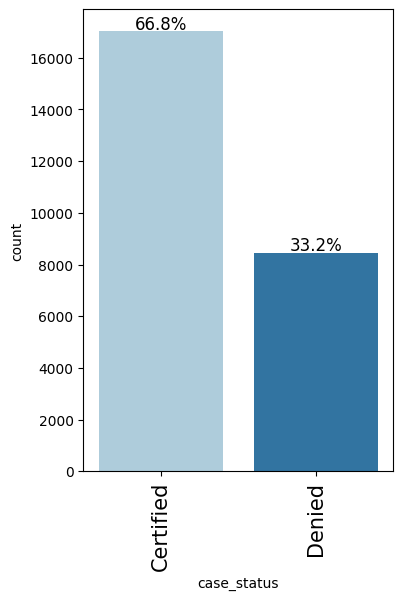

In [32]:
labeled_barplot(df, "case_status", perc=True)

**Observation**

1. Almost 1/3rd of the visa applications are denied.

## Bivariate Analysis

#### Data Corelation using Heatmap

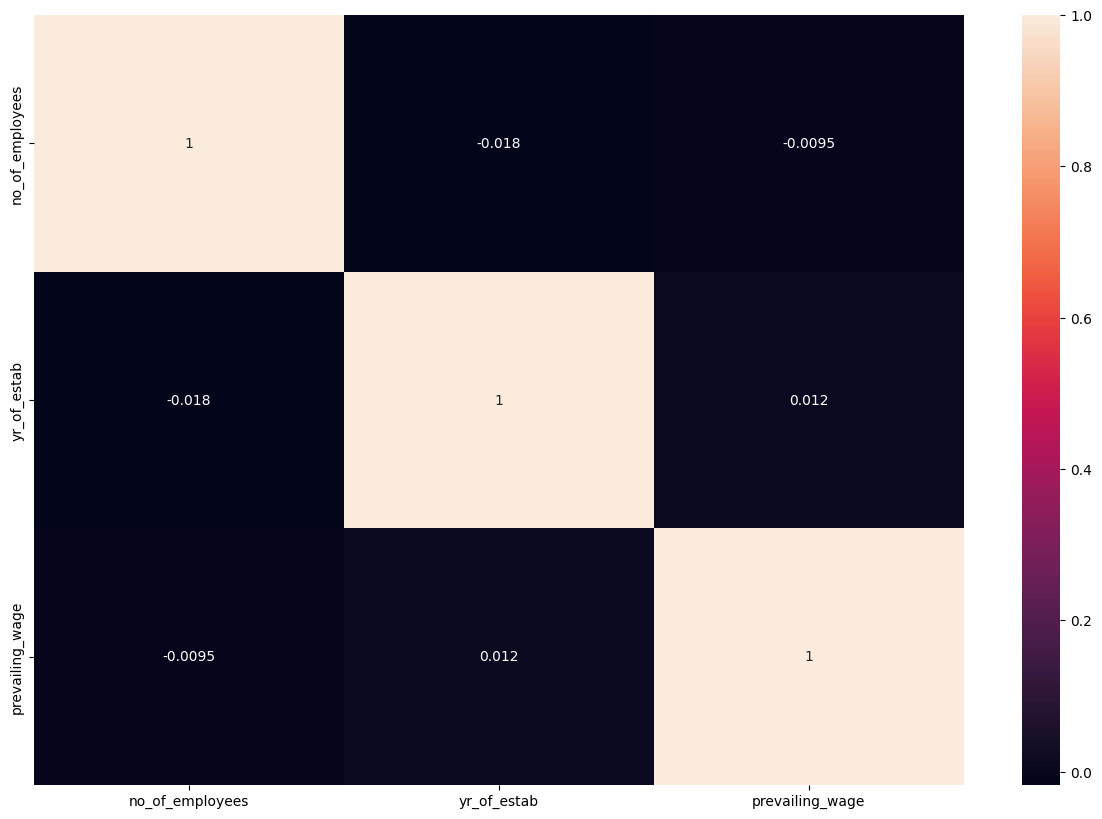

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

**Observation**

1. There is no clear relationship between the numerical columns in the dataset.

#### Observation on continent with case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


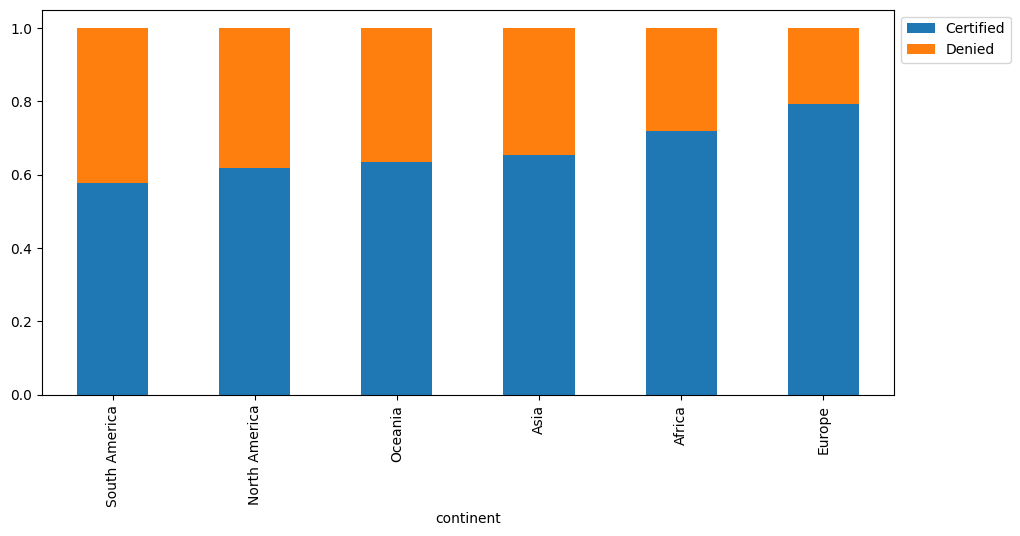

In [34]:
stacked_barplot(df,'continent','case_status')

**Observation**

1. EU hs the highest chance of getting the visa application certified.

#### Observation on education_of_employee with case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


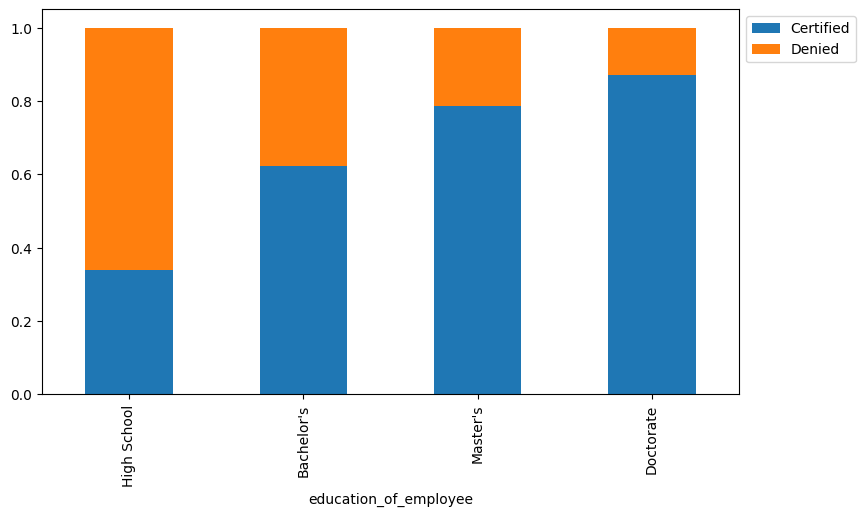

In [35]:
stacked_barplot(df,'education_of_employee','case_status')

**Observation**

1. Doctorate and Master's education level of employees have the highest chances of getting their visa application certified.

#### Observation on has_job_experience with case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


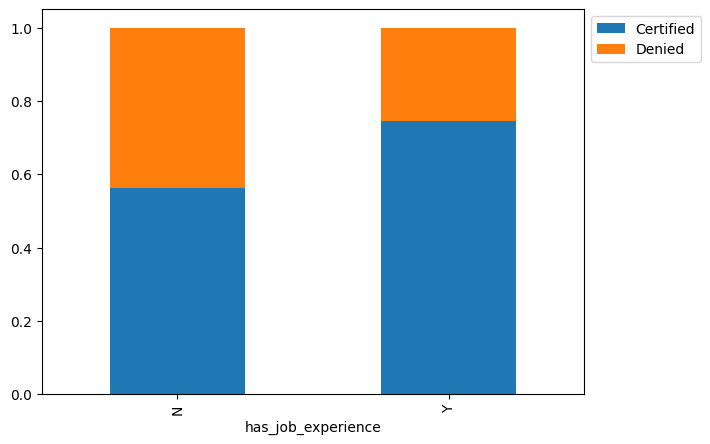

In [36]:
stacked_barplot(df,'has_job_experience','case_status')

**Observation**

1. As Expected employees which have job experience have a higher chance of getting their visa application certified.

#### Observation on requires_job_training with case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


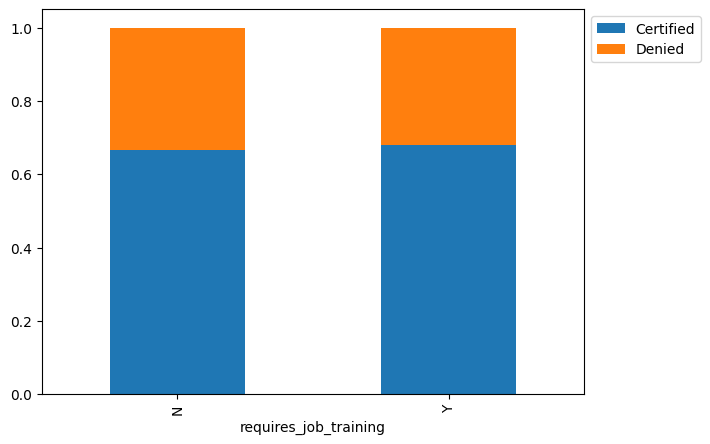

In [37]:
stacked_barplot(df,'requires_job_training','case_status')

**Observation**

1. Require job training has an equal chance of getting the visa application certified or denied.

#### Observation on no_of_employees with case_status

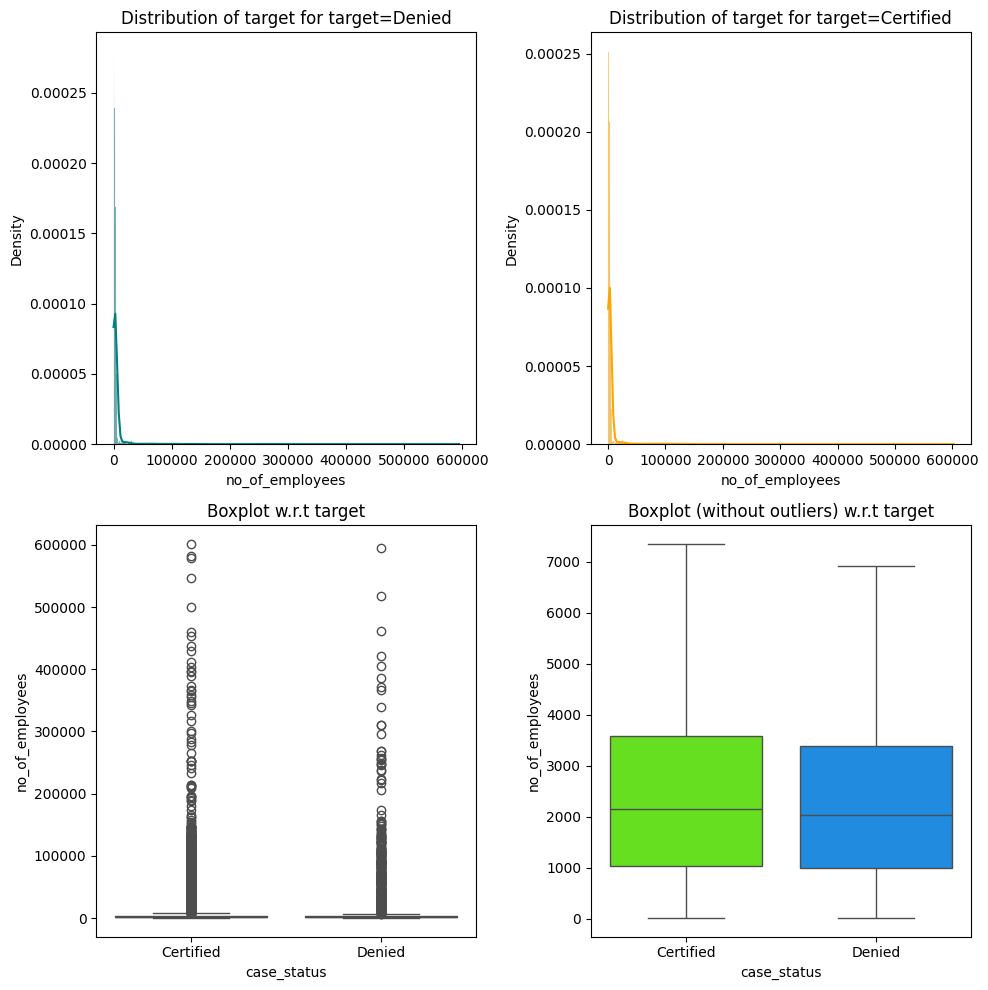

In [38]:
distribution_plot_wrt_target(df,'no_of_employees','case_status')

**Observation**

1. No meaningful relation between the no of employees and the case status column in the dataset.

#### Observation on yr_of_estab with case_status

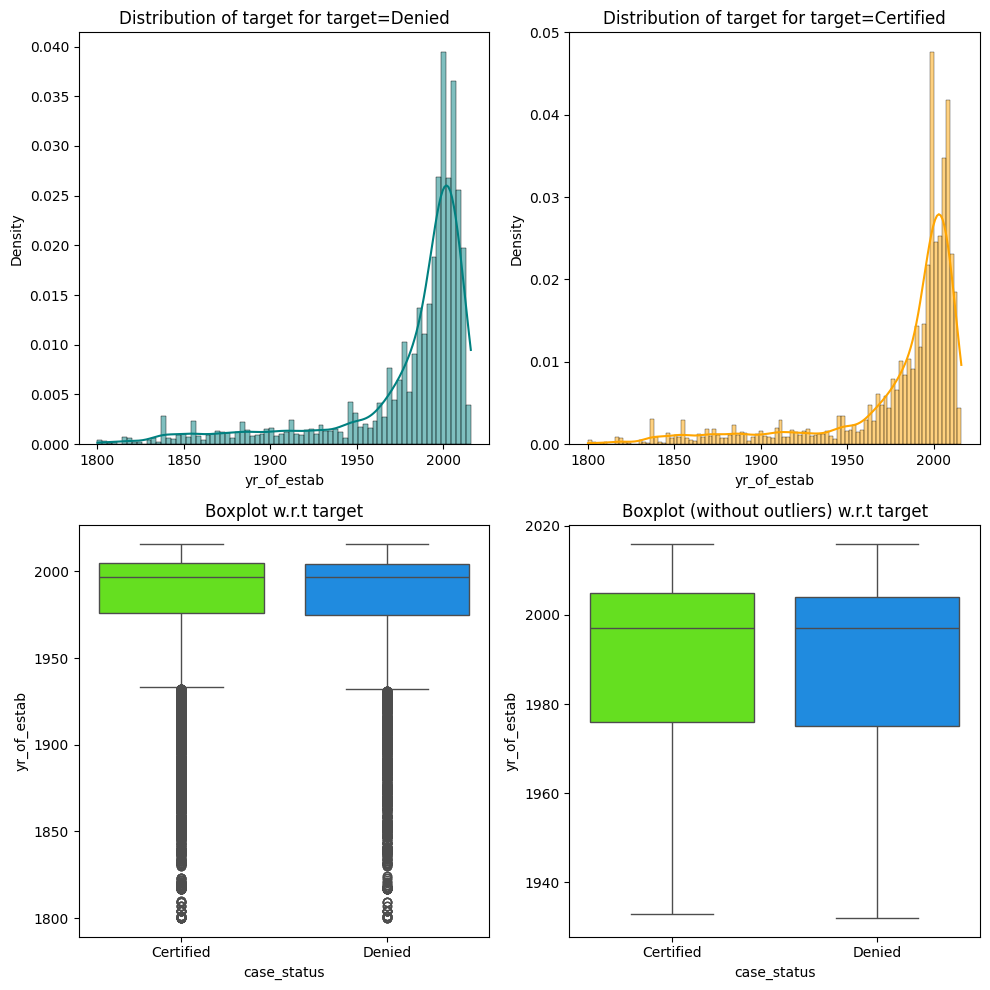

In [39]:
distribution_plot_wrt_target(df,'yr_of_estab','case_status')

**Observation**

1. No meaningful relation between the year of establishment and the case status column in the dataset.

#### Observation on region_of_employment with case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


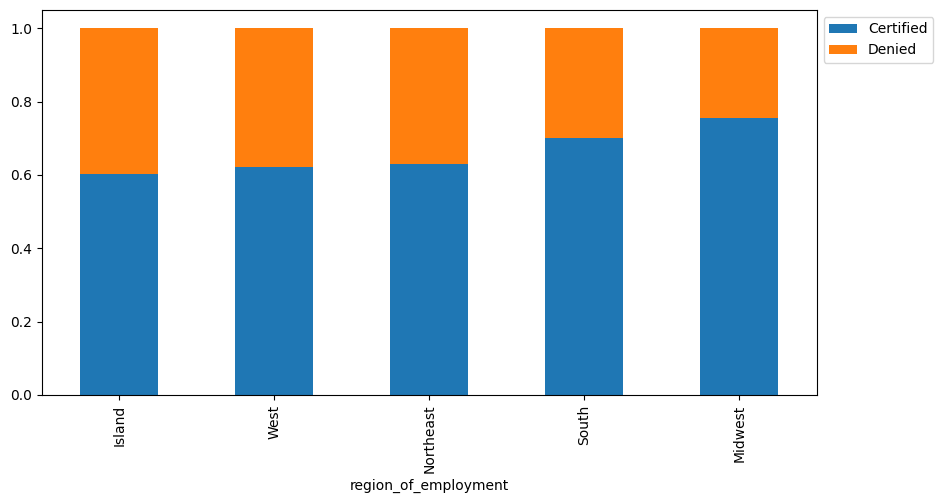

In [40]:
stacked_barplot(df,'region_of_employment','case_status')

**Observation**

1. Midwest and south regions have more chances of visa applications certified.

#### Observation on prevailing_wage with case_status

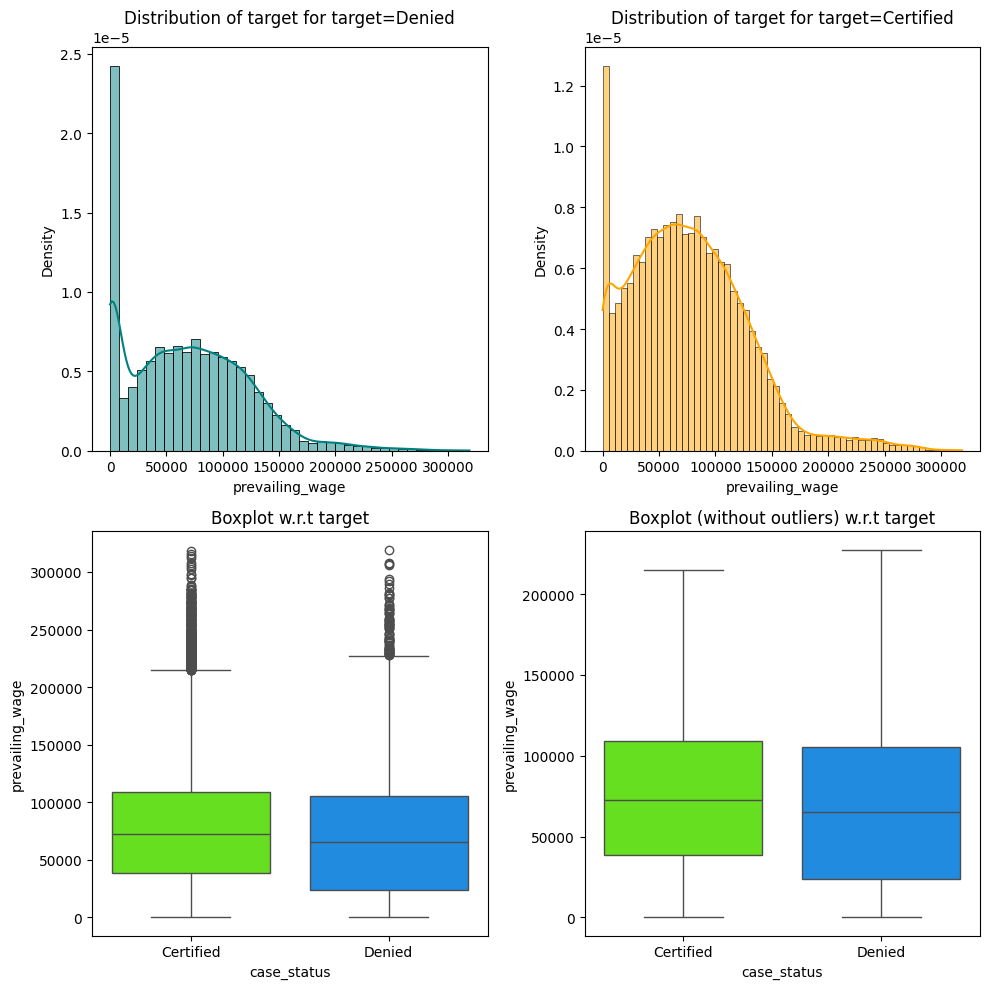

In [41]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status')

**Observation**

1. Employees with a high median prevailing wage have a high chance of getting the visa application certified.

#### Observation on unit_of_wage with case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


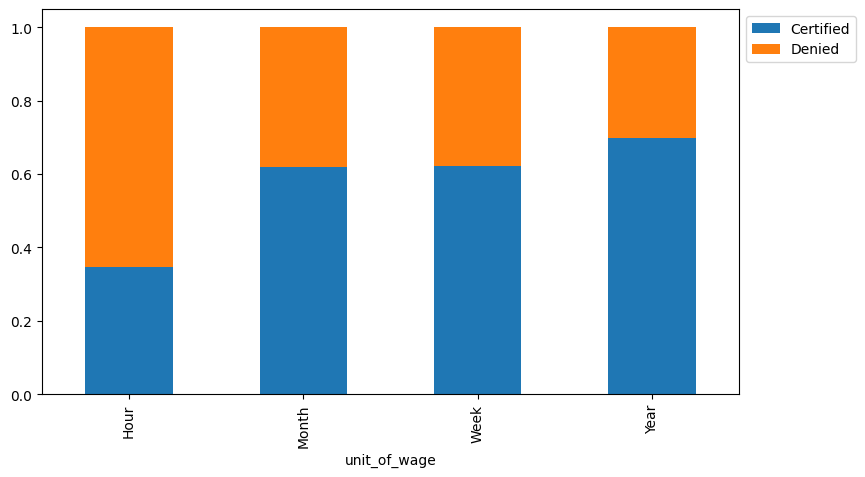

In [42]:
stacked_barplot(df,'unit_of_wage','case_status')

**Observation**

1. Applications with yearly unit of wage have a higher chance of getting the application certified.

#### Observation on full_time_position with case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


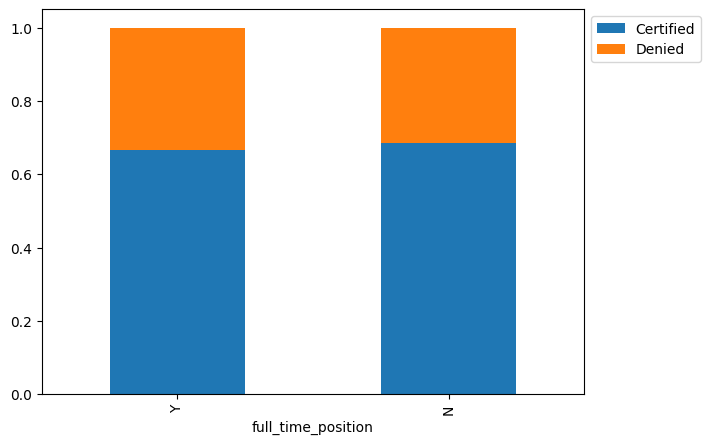

In [43]:
stacked_barplot(df,'full_time_position','case_status')

**Observation**

1. Full Time position has no effect on the visa application to be certified or denied.

# Data Preprocessing

#### Data Preparation for Modeling

In [44]:
# Splitting the dataset into train , validation and test set
x = df.drop(["case_status"], axis=1)
y = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

x_temp, x_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.20, random_state=1, stratify=y
)
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.20, random_state=1, stratify=y_temp
)

In [45]:
print("Shape of Training set : ", x_train.shape)
print("Shape of validation set : ", x_val.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (16307, 10)
Shape of validation set :  (4077, 10)
Shape of test set :  (5096, 10)
Percentage of classes in training set:
case_status
1    0.667873
0    0.332127
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667893
0    0.332107
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


In [46]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_train = x_train.astype(float)

x_val = pd.get_dummies(x_val, drop_first=True)
x_val = x_val.astype(float)

x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.astype(float)

print(x_train.shape, x_val.shape, x_test.shape)

(16307, 21) (4077, 21) (5096, 21)


# Model Building

#### Model Evaluation Criterion




**Model can make wrong predictions as:**

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

**Which case is more important**

Both the cases are important as:

If a visa is certified when it actually had to be denied, a non skilled person with get the job and also the US employee who is more skilled will not be able to get the job.

If a visa is denied when actually it had to be certified, the U.S. will lose a skilled employee.

**How to reduce the losses?**

F1 Score can be minimized as F1 score focuses on reduction both the false positives and false Negatives.

#### Common Functions

In [47]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Model Building - Original Dataset

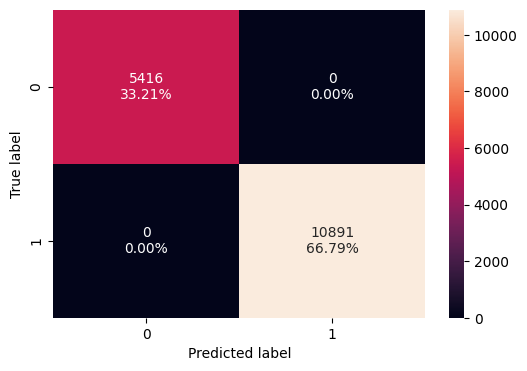

In [49]:
# Decision Tree on train Data
dtree_original = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dtree_original.fit(x_train, y_train)
dtree_perf_train_original = model_performance_classification_sklearn(
    dtree_original, x_train, y_train
)
confusion_matrix_sklearn(dtree_original, x_train, y_train)

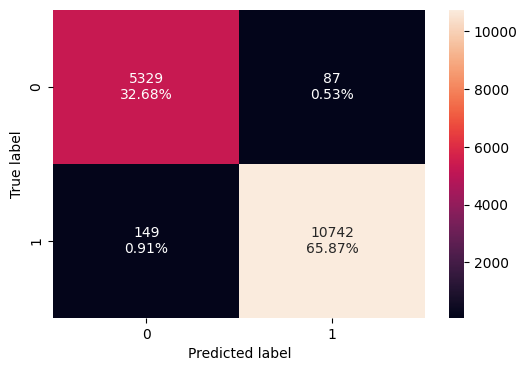

In [50]:
# Bagging Classifier on train Data
bagging_original = BaggingClassifier(random_state=1)
bagging_original.fit(x_train, y_train)
bagging_perf_train_original = model_performance_classification_sklearn(
    bagging_original, x_train, y_train
)
confusion_matrix_sklearn(bagging_original, x_train, y_train)

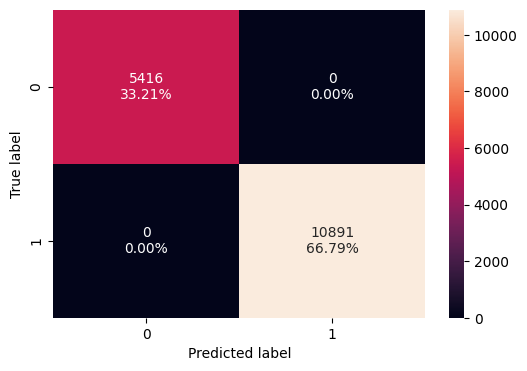

In [51]:
# Random Forest Classifier on train Data
rf_original = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_original.fit(x_train, y_train)
rf_perf_train_original = model_performance_classification_sklearn(
    rf_original, x_train, y_train
)
confusion_matrix_sklearn(rf_original, x_train, y_train)

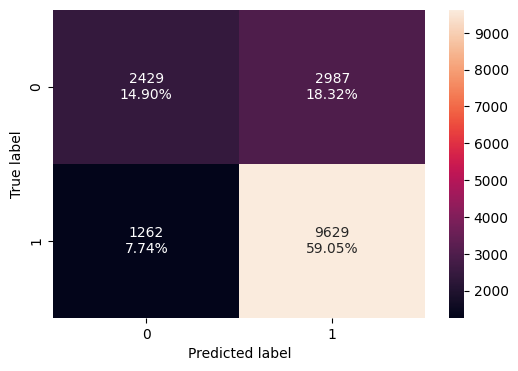

In [52]:
# ADABoost Classifier on train Data
adb_original = AdaBoostClassifier(random_state=1)
adb_original.fit(x_train, y_train)
adb_perf_train_original = model_performance_classification_sklearn(
    adb_original, x_train, y_train
)
confusion_matrix_sklearn(adb_original, x_train, y_train)

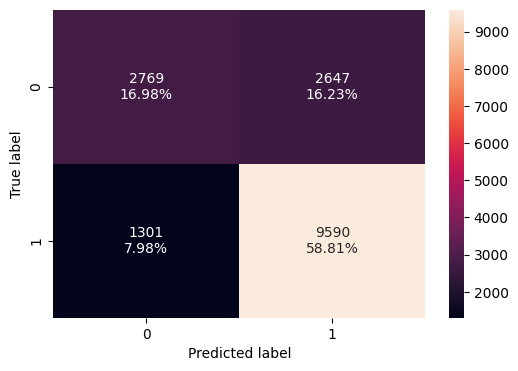

In [53]:
# Gradient Boost Classifier on train Data
gbm_original = GradientBoostingClassifier(random_state=1)
gbm_original.fit(x_train, y_train)
gbm_perf_train_original = model_performance_classification_sklearn(
    gbm_original, x_train, y_train
)
confusion_matrix_sklearn(gbm_original, x_train, y_train)

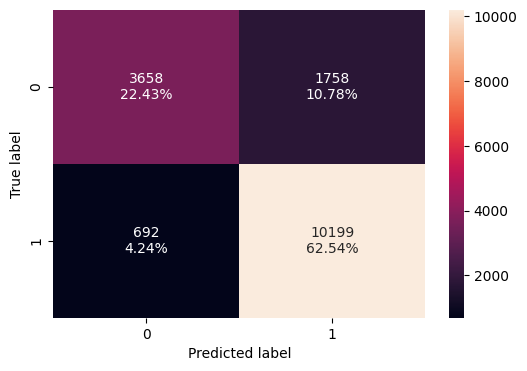

In [54]:
# XGBoost Classifier on train Data
xgb_original = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_original.fit(x_train, y_train)
xgb_perf_train_original = model_performance_classification_sklearn(
    xgb_original, x_train, y_train
)
confusion_matrix_sklearn(xgb_original, x_train, y_train)

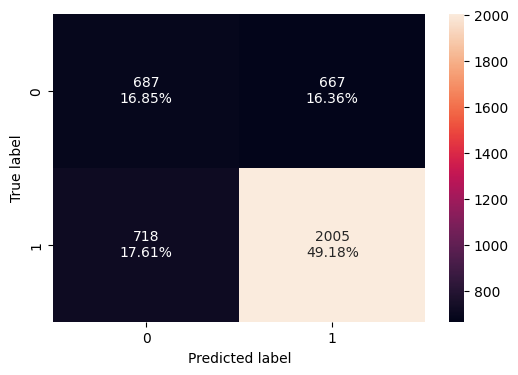

In [55]:
# Decision Tree Performance on Validation Data
dtree_perf_val_original = model_performance_classification_sklearn(
    dtree_original, x_val, y_val
)
confusion_matrix_sklearn(dtree_original, x_val, y_val)

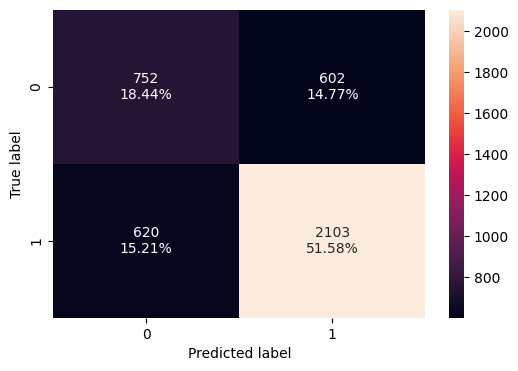

In [56]:
# Bagging Classifier Performance on Validation Data
bagging_perf_val_original = model_performance_classification_sklearn(
    bagging_original, x_val, y_val
)
confusion_matrix_sklearn(bagging_original, x_val, y_val)

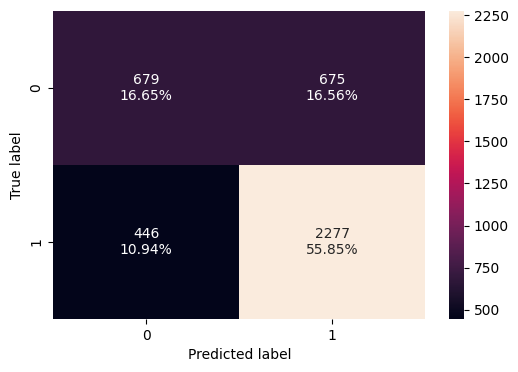

In [57]:
# Random Forest Classifier Performance on Validation Data
rf_perf_val_original = model_performance_classification_sklearn(
    rf_original, x_val, y_val
)
confusion_matrix_sklearn(rf_original, x_val, y_val)

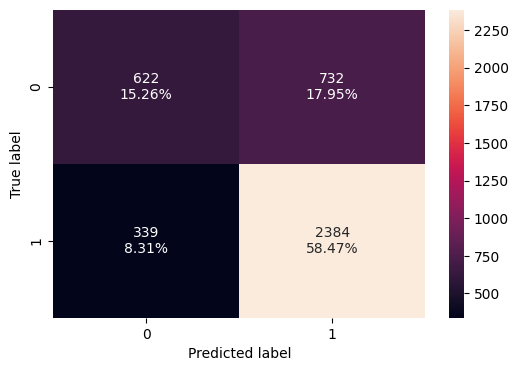

In [58]:
# ADABoost Classifier Performance on Validation Data
adb_perf_val_original = model_performance_classification_sklearn(
    adb_original, x_val, y_val
)
confusion_matrix_sklearn(adb_original, x_val, y_val)

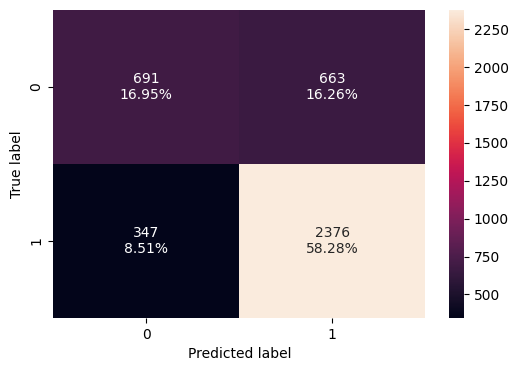

In [59]:
# Gradient Boost Classifier Performance on Validation Data
gbm_perf_val_original = model_performance_classification_sklearn(
    gbm_original, x_val, y_val
)
confusion_matrix_sklearn(gbm_original, x_val, y_val)

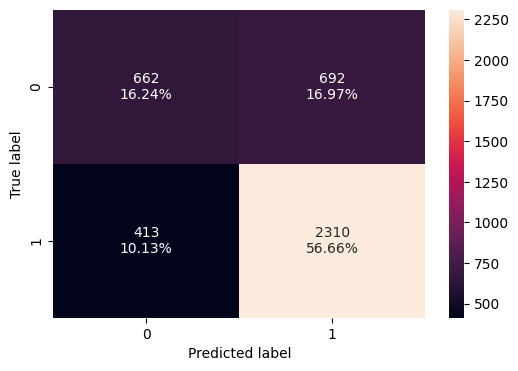

In [60]:
# XGBoost Classifier Performance on Validation Data
xgb_perf_val_original = model_performance_classification_sklearn(
    xgb_original, x_val, y_val
)
confusion_matrix_sklearn(xgb_original, x_val, y_val)

In [61]:
# Model Performance Comparison on Train data
models_train_comp_df_original = pd.concat(
    [
        dtree_perf_train_original.T,
        bagging_perf_train_original.T,
        rf_perf_train_original.T,
        adb_perf_train_original.T,
        gbm_perf_train_original.T,
        xgb_perf_train_original.T
    ],
    axis=1,
)
models_train_comp_df_original.columns = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "XG Boost"
]
print("Training performance comparison:")
models_train_comp_df_original

Training performance comparison:


,Decision Tree,Bagging,Random Forest,Ada Boost,Gradient Boost,XG Boost
Accuracy,1.0,0.985528,1.0,0.739437,0.757895,0.849758
Recall,1.0,0.986319,1.0,0.884125,0.880544,0.936461
Precision,1.0,0.991966,1.0,0.763237,0.783689,0.852973
F1,1.0,0.989134,1.0,0.819245,0.829298,0.892770


In [62]:
# Model Performance Comparison on Validation data
models_val_comp_df_original = pd.concat(
    [
        dtree_perf_val_original.T,
        bagging_perf_val_original.T,
        rf_perf_val_original.T,
        adb_perf_val_original.T,
        gbm_perf_val_original.T,
        xgb_perf_val_original.T
    ],
    axis=1,
)
models_val_comp_df_original.columns = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "XG Boost"
]
print("Validation performance comparison:")
models_val_comp_df_original

Validation performance comparison:


,Decision Tree,Bagging,Random Forest,Ada Boost,Gradient Boost,XG Boost
Accuracy,0.660289,0.700270,0.725043,0.737307,0.752269,0.728967
Recall,0.736320,0.772310,0.836210,0.875505,0.872567,0.848329
Precision,0.750374,0.777449,0.771341,0.765083,0.781836,0.769487
F1,0.743281,0.774871,0.802467,0.816578,0.824714,0.806987


In [63]:
# F1 Score Comparison on Original Train and Validation Data

data = {
    'Decision Tree': [dtree_perf_train_original.F1.values[0], dtree_perf_val_original.F1.values[0], dtree_perf_train_original.F1.values[0] - dtree_perf_val_original.F1.values[0]],
    'Bagging': [bagging_perf_train_original.F1.values[0], bagging_perf_val_original.F1.values[0], bagging_perf_train_original.F1.values[0] - bagging_perf_val_original.F1.values[0]],
    'Random Forest': [rf_perf_train_original.F1.values[0], rf_perf_val_original.F1.values[0], rf_perf_train_original.F1.values[0] - rf_perf_val_original.F1.values[0]],
    'Ada Boost': [adb_perf_train_original.F1.values[0], adb_perf_val_original.F1.values[0], adb_perf_train_original.F1.values[0] - adb_perf_val_original.F1.values[0]],
    'Gradient Boost': [gbm_perf_train_original.F1.values[0], gbm_perf_val_original.F1.values[0], gbm_perf_train_original.F1.values[0] - gbm_perf_val_original.F1.values[0]],
    'XG Boost': [xgb_perf_train_original.F1.values[0], xgb_perf_val_original.F1.values[0], xgb_perf_train_original.F1.values[0] - xgb_perf_val_original.F1.values[0]]
}
models_val_diff_df_original = pd.DataFrame(data)
models_val_diff_df_original.index = ['Train', 'Validation', 'Difference']
print("F1 Difference Between Train and Validation on original data")
models_val_diff_df_original.T

F1 Difference Between Train and Validation on original data


,Train,Validation,Difference
Decision Tree,1.000000,0.743281,0.256719
Bagging,0.989134,0.774871,0.214263
Random Forest,1.000000,0.802467,0.197533
Ada Boost,0.819245,0.816578,0.002667
Gradient Boost,0.829298,0.824714,0.004584
XG Boost,0.892770,0.806987,0.085783


#### Model Building - Oversampled Dataset

In [64]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(x_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10891
Before Oversampling, counts of label 'No': 5416 

After Oversampling, counts of label 'Yes': 10891
After Oversampling, counts of label 'No': 10891 

After Oversampling, the shape of train_X: (21782, 21)
After Oversampling, the shape of train_y: (21782,) 



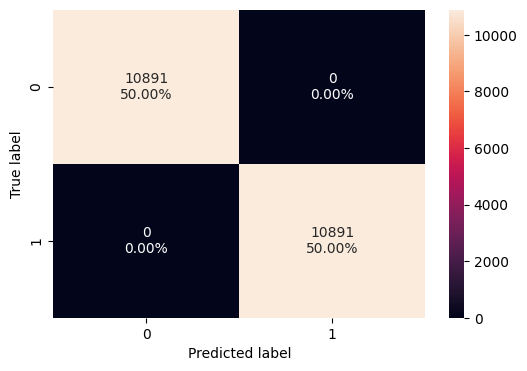

In [65]:
# Decision Tree on train Data
dtree_over = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dtree_over.fit(x_train_over, y_train_over)
dtree_perf_train_over = model_performance_classification_sklearn(
    dtree_over, x_train_over, y_train_over
)
confusion_matrix_sklearn(dtree_over, x_train_over, y_train_over)

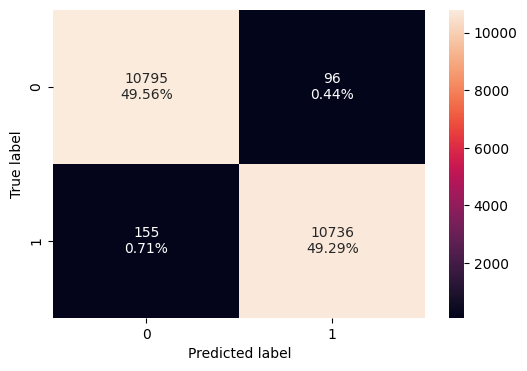

In [66]:
# Bagging Classifier on train Data
bagging_over = BaggingClassifier(random_state=1)
bagging_over.fit(x_train_over, y_train_over)
bagging_perf_train_over = model_performance_classification_sklearn(
    bagging_over, x_train_over, y_train_over
)
confusion_matrix_sklearn(bagging_over, x_train_over, y_train_over)

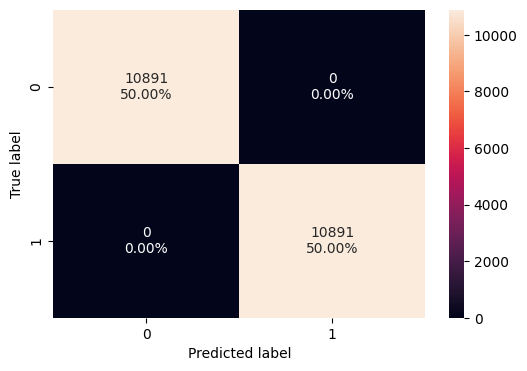

In [67]:
# Random Forest Classifier on train Data
rf_over = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_over.fit(x_train_over, y_train_over)
rf_perf_train_over = model_performance_classification_sklearn(
    rf_over, x_train_over, y_train_over
)
confusion_matrix_sklearn(rf_over, x_train_over, y_train_over)

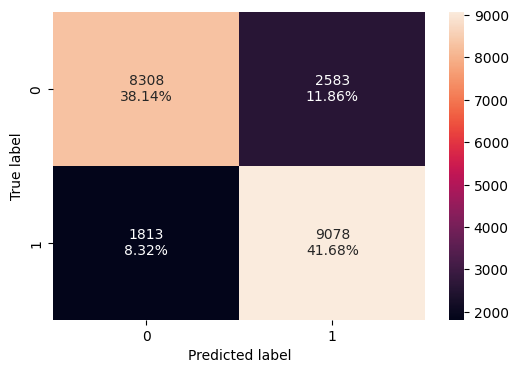

In [68]:
# ADABoost Classifier on train Data
adb_over = AdaBoostClassifier(random_state=1)
adb_over.fit(x_train_over, y_train_over)
adb_perf_train_over = model_performance_classification_sklearn(
    adb_over, x_train_over, y_train_over
)
confusion_matrix_sklearn(adb_over, x_train_over, y_train_over)

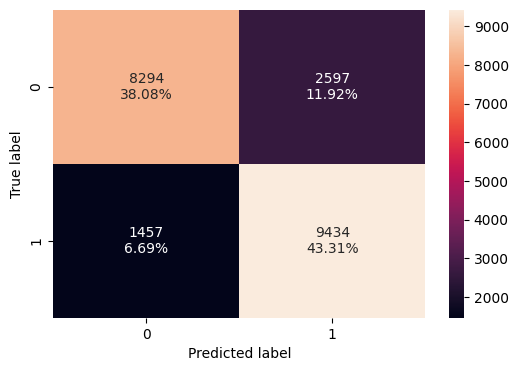

In [69]:
# Gradient Boost Classifier on train Data
gbm_over = GradientBoostingClassifier(random_state=1)
gbm_over.fit(x_train_over, y_train_over)
gbm_perf_train_over = model_performance_classification_sklearn(
    gbm_over, x_train_over, y_train_over
)
confusion_matrix_sklearn(gbm_over, x_train_over, y_train_over)

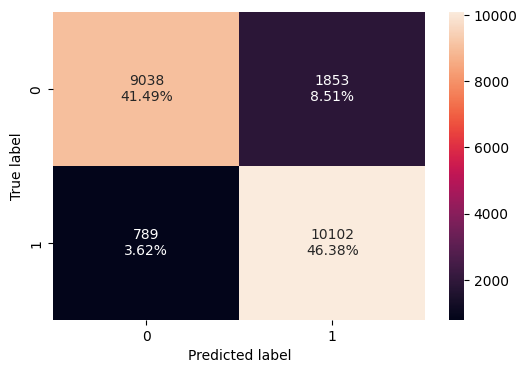

In [70]:
# XGBoost Classifier on train Data
xgb_over = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_over.fit(x_train_over, y_train_over)
xgb_perf_train_over = model_performance_classification_sklearn(
    xgb_over, x_train_over, y_train_over
)
confusion_matrix_sklearn(xgb_over, x_train_over, y_train_over)

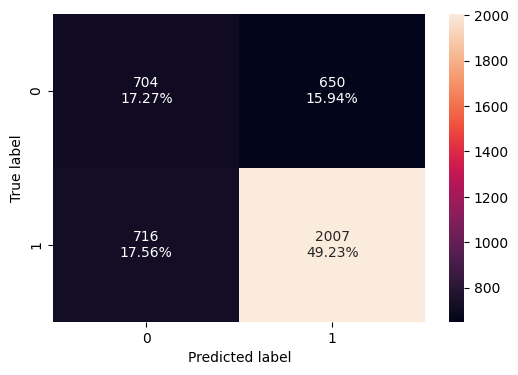

In [71]:
# Decision Tree on Validation Data
dtree_perf_val_over = model_performance_classification_sklearn(
    dtree_over, x_val, y_val
)
confusion_matrix_sklearn(dtree_over, x_val, y_val)

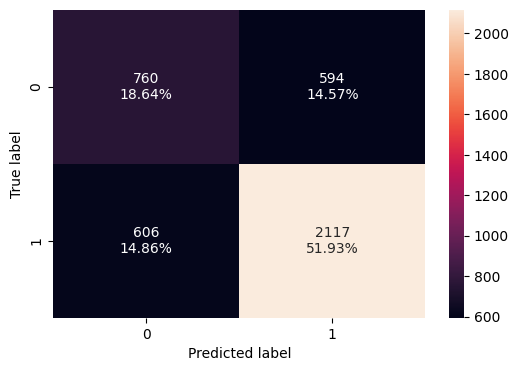

In [72]:
# Bagging Classifier on Validation Data
bagging_perf_val_over = model_performance_classification_sklearn(
    bagging_over, x_val, y_val
)
confusion_matrix_sklearn(bagging_over, x_val, y_val)

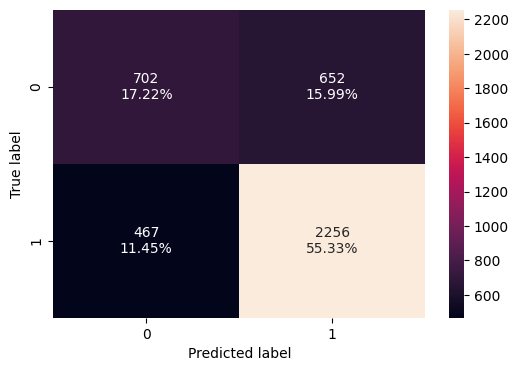

In [73]:
# Random Forest Classifier on Validation Data
rf_perf_val_over = model_performance_classification_sklearn(
    rf_over, x_val, y_val
)
confusion_matrix_sklearn(rf_over, x_val, y_val)

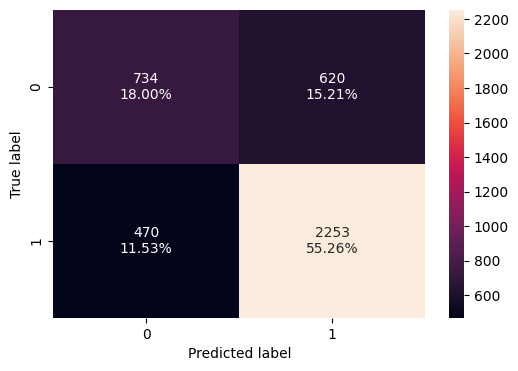

In [74]:
# ADABoost Classifier on Validation Data
adb_perf_val_over = model_performance_classification_sklearn(
    adb_over, x_val, y_val
)
confusion_matrix_sklearn(adb_over, x_val, y_val)

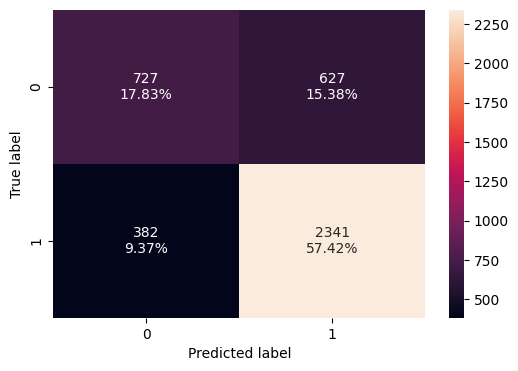

In [75]:
# Gradient Boost Classifier on Validation Data
gbm_perf_val_over = model_performance_classification_sklearn(
    gbm_over, x_val, y_val
)
confusion_matrix_sklearn(gbm_over, x_val, y_val)

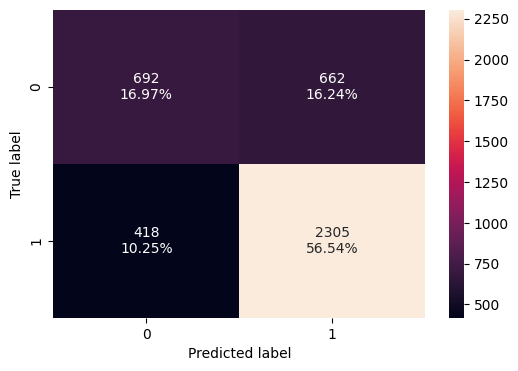

In [76]:
# XGBoost Classifier on Validation Data
xgb_perf_val_over = model_performance_classification_sklearn(
    xgb_over, x_val, y_val
)
confusion_matrix_sklearn(xgb_over, x_val, y_val)

In [77]:
# Performance Comparison of Models on Training Oversampled Data

models_train_comp_df_over = pd.concat(
    [
        dtree_perf_train_over.T,
        bagging_perf_train_over.T,
        rf_perf_train_over.T,
        adb_perf_train_over.T,
        gbm_perf_train_over.T,
        xgb_perf_train_over.T
    ],
    axis=1,
)
models_train_comp_df_over.columns = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "XG Boost"
]
print("Training performance comparison for oversampled data:")
models_train_comp_df_over

Training performance comparison for oversampled data:


,Decision Tree,Bagging,Random Forest,Ada Boost,Gradient Boost,XG Boost
Accuracy,1.0,0.988477,1.0,0.798182,0.813883,0.878707
Recall,1.0,0.985768,1.0,0.833532,0.866220,0.927555
Precision,1.0,0.991137,1.0,0.778492,0.784141,0.845002
F1,1.0,0.988445,1.0,0.805073,0.823139,0.884356


In [78]:
# Performance Comparison of Models on Validation Oversampled Data

models_val_comp_df_over = pd.concat(
    [
        dtree_perf_val_over.T,
        bagging_perf_val_over.T,
        rf_perf_val_over.T,
        adb_perf_val_over.T,
        gbm_perf_val_over.T,
        xgb_perf_val_over.T
    ],
    axis=1,
)
models_val_comp_df_over.columns = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "XG Boost"
]
print("Validation performance comparison on oversampled data:")
models_val_comp_df_over

Validation performance comparison on oversampled data:


,Decision Tree,Bagging,Random Forest,Ada Boost,Gradient Boost,XG Boost
Accuracy,0.664950,0.705666,0.725533,0.732647,0.752514,0.735099
Recall,0.737055,0.777451,0.828498,0.827396,0.859714,0.846493
Precision,0.755363,0.780893,0.775791,0.784198,0.788747,0.776879
F1,0.746097,0.779168,0.801279,0.805218,0.822703,0.810193


In [79]:
#F1 Score Performance Comparison on Oversampled Data
data = {
    'Decision Tree': [dtree_perf_train_over.F1.values[0], dtree_perf_val_over.F1.values[0], dtree_perf_train_over.F1.values[0] - dtree_perf_val_over.F1.values[0]],
    'Bagging': [bagging_perf_train_over.F1.values[0], bagging_perf_val_over.F1.values[0], bagging_perf_train_over.F1.values[0] - bagging_perf_val_over.F1.values[0]],
    'Random Forest': [rf_perf_train_over.F1.values[0], rf_perf_val_over.F1.values[0], rf_perf_train_over.F1.values[0] - rf_perf_val_over.F1.values[0]],
    'Ada Boost': [adb_perf_train_over.F1.values[0], adb_perf_val_over.F1.values[0], adb_perf_train_over.F1.values[0] - adb_perf_val_over.F1.values[0]],
    'Gradient Boost': [gbm_perf_train_over.F1.values[0], gbm_perf_val_over.F1.values[0], gbm_perf_train_over.F1.values[0] - gbm_perf_val_over.F1.values[0]],
    'XG Boost': [xgb_perf_train_over.F1.values[0], xgb_perf_val_over.F1.values[0], xgb_perf_train_over.F1.values[0] - xgb_perf_val_over.F1.values[0]]
}
models_val_diff_df_over = pd.DataFrame(data)
models_val_diff_df_over.index = ['Train', 'Validation', 'Difference']
models_val_diff_df_over.T
print("F1 Difference Between Train and Validation on oversampled data")
models_val_diff_df_over.T

F1 Difference Between Train and Validation on oversampled data


,Train,Validation,Difference
Decision Tree,1.000000,0.746097,0.253903
Bagging,0.988445,0.779168,0.209277
Random Forest,1.000000,0.801279,0.198721
Ada Boost,0.805073,0.805218,-0.000145
Gradient Boost,0.823139,0.822703,0.000437
XG Boost,0.884356,0.810193,0.074163


#### Model Building - Undersampled Dataset

In [80]:
# Undersampling Data
rus = RandomUnderSampler(random_state=1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(x_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10891
Before Under Sampling, counts of label 'No': 5416 

After Under Sampling, counts of label 'Yes': 5416
After Under Sampling, counts of label 'No': 5416 

After Under Sampling, the shape of train_X: (10832, 21)
After Under Sampling, the shape of train_y: (10832,) 



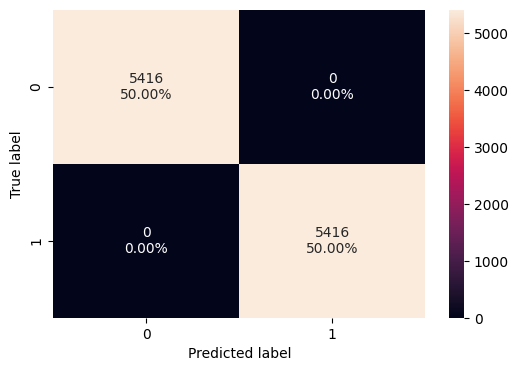

In [81]:
# Decision Tree on train Data
dtree_un = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dtree_un.fit(x_train_un, y_train_un)
dtree_perf_train_un = model_performance_classification_sklearn(
    dtree_un, x_train_un, y_train_un
)
confusion_matrix_sklearn(dtree_un, x_train_un, y_train_un)

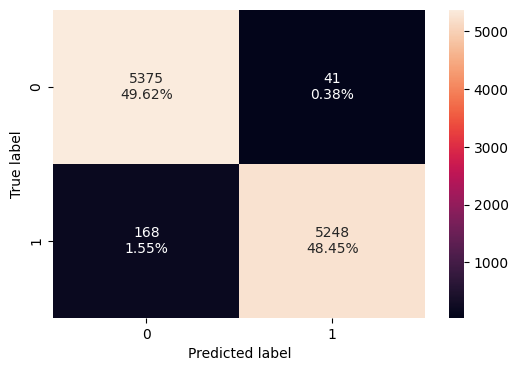

In [82]:
# Bagging Classifier on train Data
bagging_un = BaggingClassifier(random_state=1)
bagging_un.fit(x_train_un, y_train_un)
bagging_perf_train_un = model_performance_classification_sklearn(
    bagging_un, x_train_un, y_train_un
)
confusion_matrix_sklearn(bagging_un, x_train_un, y_train_un)

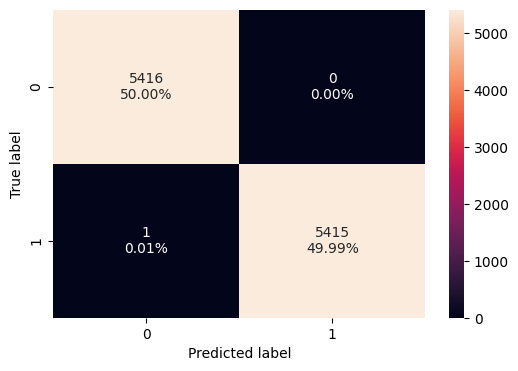

In [83]:
# Random Forest Classifier on train Data
rf_un = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_un.fit(x_train_un, y_train_un)
rf_perf_train_un = model_performance_classification_sklearn(
    rf_un, x_train_un, y_train_un
)
confusion_matrix_sklearn(rf_un, x_train_un, y_train_un)

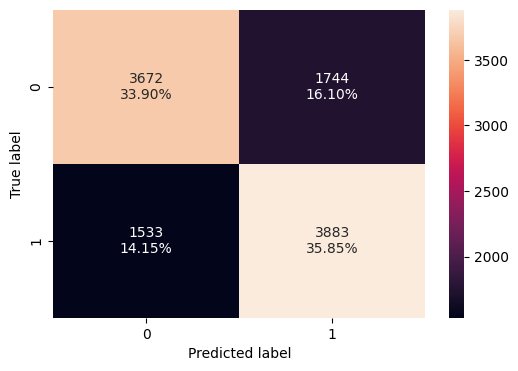

In [84]:
# ADABoost Classifier on train Data
adb_un = AdaBoostClassifier(random_state=1)
adb_un.fit(x_train_un, y_train_un)
adb_perf_train_un = model_performance_classification_sklearn(
    adb_un, x_train_un, y_train_un
)
confusion_matrix_sklearn(adb_un, x_train_un, y_train_un)

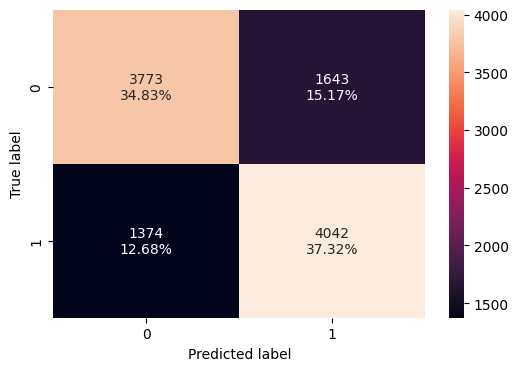

In [85]:
# Gradient Boost Classifier on train Data
gbm_un = GradientBoostingClassifier(random_state=1)
gbm_un.fit(x_train_un, y_train_un)
gbm_perf_train_un = model_performance_classification_sklearn(
    gbm_un, x_train_un, y_train_un
)
confusion_matrix_sklearn(gbm_un, x_train_un, y_train_un)

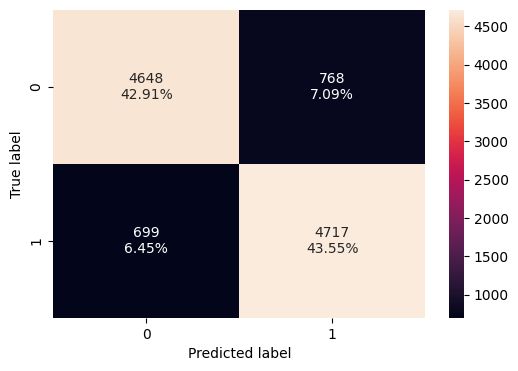

In [86]:
# XGBoost Classifier on train Data
xgb_un = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_un.fit(x_train_un, y_train_un)
xgb_perf_train_un = model_performance_classification_sklearn(
    xgb_un, x_train_un, y_train_un
)
confusion_matrix_sklearn(xgb_un, x_train_un, y_train_un)

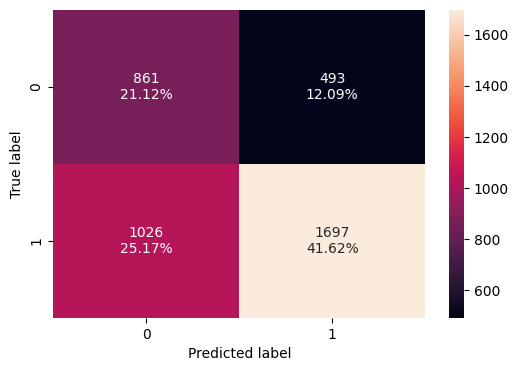

In [87]:
# Decision Tree on Validation Data
dtree_perf_val_un = model_performance_classification_sklearn(
    dtree_un, x_val, y_val
)
confusion_matrix_sklearn(dtree_un, x_val, y_val)

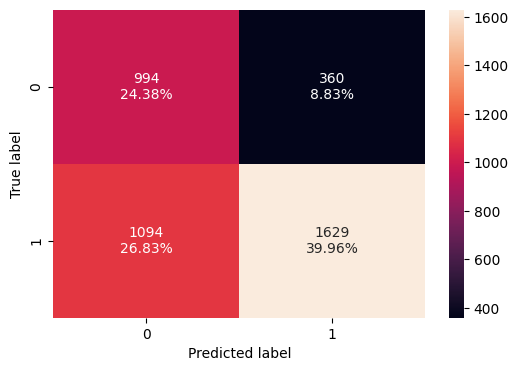

In [88]:
# Bagging Classifier on Validation Data
bagging_perf_val_un = model_performance_classification_sklearn(
    bagging_un, x_val, y_val
)
confusion_matrix_sklearn(bagging_un, x_val, y_val)

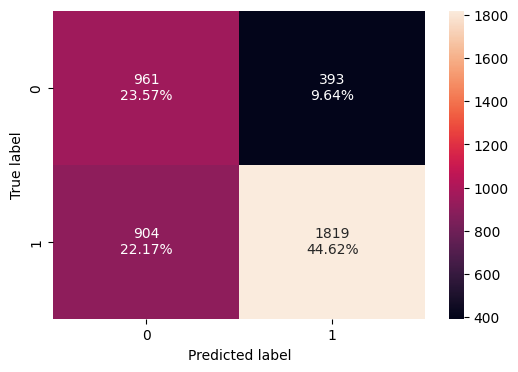

In [89]:
# Random Forest Classifier on Validation Data
rf_perf_val_un = model_performance_classification_sklearn(
    rf_un, x_val, y_val
)
confusion_matrix_sklearn(rf_un, x_val, y_val)

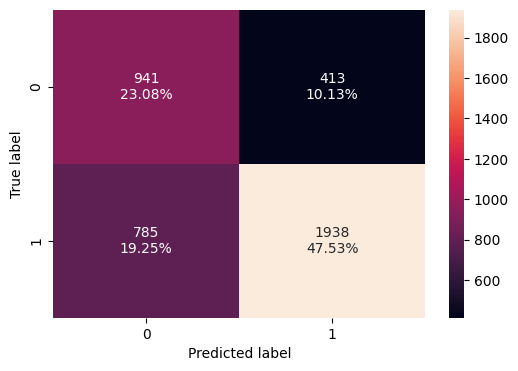

In [90]:
# ADABoost Classifier on Validation Data
adb_perf_val_un = model_performance_classification_sklearn(
    adb_un, x_val, y_val
)
confusion_matrix_sklearn(adb_un, x_val, y_val)

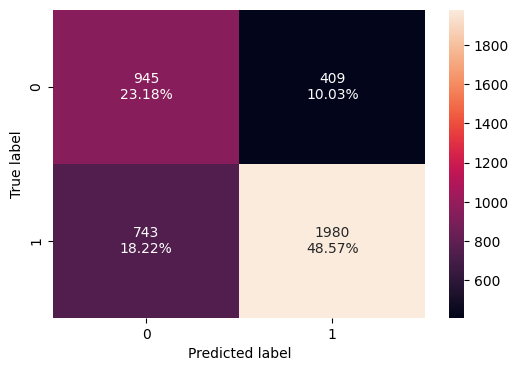

In [91]:
# Gradient Boost Classifier on Validation Data
gbm_perf_val_un = model_performance_classification_sklearn(
    gbm_un, x_val, y_val
)
confusion_matrix_sklearn(gbm_un, x_val, y_val)

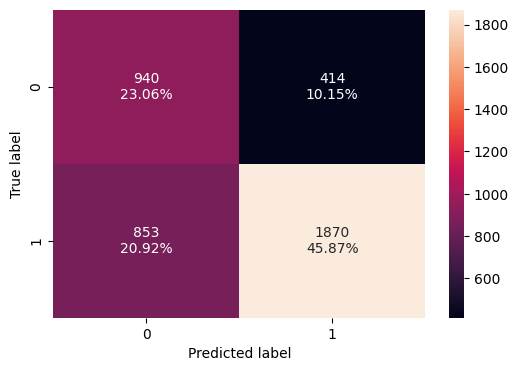

In [92]:
# XGBoost Classifier on Validation Data
xgb_perf_val_un = model_performance_classification_sklearn(
    xgb_un, x_val, y_val
)
confusion_matrix_sklearn(xgb_un, x_val, y_val)

In [93]:
# Performance Comparison of Models on Training Undersampled Data
models_train_comp_df_un = pd.concat(
    [
        dtree_perf_train_un.T,
        bagging_perf_train_un.T,
        rf_perf_train_un.T,
        adb_perf_train_un.T,
        gbm_perf_train_un.T,
        xgb_perf_train_un.T
    ],
    axis=1,
)
models_train_comp_df_un.columns = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "XG Boost"
]
print("Training performance comparison for undersampled data:")
models_train_comp_df_un

Training performance comparison for undersampled data:


,Decision Tree,Bagging,Random Forest,Ada Boost,Gradient Boost,XG Boost
Accuracy,1.0,0.980705,0.999908,0.697470,0.721473,0.864568
Recall,1.0,0.968981,0.999815,0.716950,0.746307,0.870938
Precision,1.0,0.992248,1.000000,0.690066,0.710994,0.859982
F1,1.0,0.980476,0.999908,0.703251,0.728223,0.865425


In [94]:
# Performance Comparison of Models on Training Undersampled Data

models_val_comp_df_un = pd.concat(
    [
        dtree_perf_val_un.T,
        bagging_perf_val_un.T,
        rf_perf_val_un.T,
        adb_perf_val_un.T,
        gbm_perf_val_un.T,
        xgb_perf_val_un.T
    ],
    axis=1,
)
models_val_comp_df_un.columns = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "XG Boost"
]
print("Validation performance comparison on undersampled data:")
models_val_comp_df_un

Validation performance comparison on undersampled data:


,Decision Tree,Bagging,Random Forest,Ada Boost,Gradient Boost,XG Boost
Accuracy,0.627422,0.643365,0.681874,0.706156,0.717439,0.689232
Recall,0.623210,0.598237,0.668013,0.711715,0.727139,0.686743
Precision,0.774886,0.819005,0.822333,0.824330,0.828799,0.818739
F1,0.690820,0.691426,0.737183,0.763894,0.774648,0.746954


In [95]:
# F1 Score Performance Comparison on Undersampled Data
data = {
    'Decision Tree': [dtree_perf_train_un.F1.values[0], dtree_perf_val_un.F1.values[0], dtree_perf_train_un.F1.values[0] - dtree_perf_val_un.F1.values[0]],
    'Bagging': [bagging_perf_train_un.F1.values[0], bagging_perf_val_un.F1.values[0], bagging_perf_train_un.F1.values[0] - bagging_perf_val_un.F1.values[0]],
    'Random Forest': [rf_perf_train_un.F1.values[0], rf_perf_val_un.F1.values[0], rf_perf_train_un.F1.values[0] - rf_perf_val_un.F1.values[0]],
    'Ada Boost': [adb_perf_train_un.F1.values[0], adb_perf_val_un.F1.values[0], adb_perf_train_un.F1.values[0] - adb_perf_val_un.F1.values[0]],
    'Gradient Boost': [gbm_perf_train_un.F1.values[0], gbm_perf_val_un.F1.values[0], gbm_perf_train_un.F1.values[0] - gbm_perf_val_un.F1.values[0]],
    'XG Boost': [xgb_perf_train_un.F1.values[0], xgb_perf_val_un.F1.values[0], xgb_perf_train_un.F1.values[0] - xgb_perf_val_un.F1.values[0]]
}
models_val_diff_df_un = pd.DataFrame(data)
models_val_diff_df_un.index = ['Train', 'Validation', 'Difference']
models_val_diff_df_un.T
print("F1 Difference Between Train and Validation on undersampled data")
models_val_diff_df_un.T

F1 Difference Between Train and Validation on undersampled data


,Train,Validation,Difference
Decision Tree,1.000000,0.690820,0.309180
Bagging,0.980476,0.691426,0.289050
Random Forest,0.999908,0.737183,0.262724
Ada Boost,0.703251,0.763894,-0.060643
Gradient Boost,0.728223,0.774648,-0.046425
XG Boost,0.865425,0.746954,0.118471


#### Top 3 Model Selection

- After building 18 models, it was observed that both the GBM and Adaboost models, trained on an oversampled dataset, as well as the GBM model trained on an original dataset, exhibited strong performance on both the training and validation datasets.

- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

# HyperParamater Tuning

### Tuning Gradient Boost on oversampled data

In [96]:
#Creating pipeline
model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1, class_weight="balanced")],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(150), 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8176920173627996:


In [97]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=150,
    max_features=0.7,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_over.fit(x_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=150, random_state=1, subsample=0.8)

In [98]:
tuned_gbm_over_train_perf = model_performance_classification_sklearn(
    tuned_gbm_over, x_train_over, y_train_over
)
tuned_gbm_over_train_perf

,Accuracy,Recall,Precision,F1
0,0.812598,0.861904,0.784538,0.821404


In [99]:
tuned_gbm_over_val_perf = model_performance_classification_sklearn(tuned_gbm_over, x_val, y_val)
tuned_gbm_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.751042,0.855674,0.789295,0.821145


### Tuning AdaBoost with oversampled data

In [100]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1, class_weight="balanced"),
        DecisionTreeClassifier(max_depth=2, random_state=1, class_weight="balanced"),
        DecisionTreeClassifier(max_depth=3, random_state=1, class_weight="balanced"),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(20), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1)} with CV score=0.8112568881461533:
CPU times: user 3.49 s, sys: 2.49 s, total: 5.99 s
Wall time: 2min 18s


In [101]:
tuned_adb_over = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_over.fit(x_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1)

In [102]:
adb_train_perf = model_performance_classification_sklearn(tuned_adb_over, x_train_over, y_train_over)
adb_train_perf

,Accuracy,Recall,Precision,F1
0,0.80213,0.880727,0.761089,0.816549


In [103]:
adb_val_perf = model_performance_classification_sklearn(tuned_adb_over, x_val, y_val)
adb_val_perf

,Accuracy,Recall,Precision,F1
0,0.738043,0.873302,0.766849,0.816621


### Tuning Gradient Boost on original data

In [104]:
#Creating pipeline
model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1, class_weight="balanced")],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(150), 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8243391874022604:


In [105]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=150,
    max_features=0.7,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=150, random_state=1, subsample=0.8)

In [106]:
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, x_train, y_train
)
tuned_gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.755381,0.880819,0.780935,0.827875


In [107]:
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, x_val, y_val)
tuned_gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.75325,0.876974,0.780647,0.826012


### Tuning XGBoost

In [108]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

Best parameters are {'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'learning_rate': 0.2, 'n_estimators': 10, 'scale_pos_weight': 1, 'subsample': 1} with CV score=0.8274380087295963:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [109]:
#Calculating different metrics
xgb_tuned_over_train_perf=model_performance_classification_sklearn(xgb_tuned,x_train_over,y_train_over)
print("Training performance:\n",xgb_tuned_over_train_perf)
xgb_tuned_over_val_perf=model_performance_classification_sklearn(xgb_tuned,x_val,y_val)
print("Validation performance:\n",xgb_tuned_over_val_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.669911  0.906804   0.615289  0.73313
Validation performance:
    Accuracy    Recall  Precision        F1
0   0.75374  0.904517   0.768007  0.830691


# Model Comparison and Final Model Selection

In [110]:
# training performance comparison on tuned models

models_train_comp_df = pd.concat(
    [
        tuned_gbm_over_train_perf.T,
        adb_train_perf.T,
        tuned_gbm_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Original data",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Oversampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Original data
Accuracy,0.812598,0.802130,0.755381
Recall,0.861904,0.880727,0.880819
Precision,0.784538,0.761089,0.780935
F1,0.821404,0.816549,0.827875


In [111]:
# Validation performance comparison on tuned models

models_train_comp_df = pd.concat(
    [ tuned_gbm_over_val_perf.T, adb_val_perf.T, tuned_gbm_val_perf.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Original data",

]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Oversampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Original data
Accuracy,0.751042,0.738043,0.753250
Recall,0.855674,0.873302,0.876974
Precision,0.789295,0.766849,0.780647
F1,0.821145,0.816621,0.826012


- Tuned GradientBoost model with oversampled dataset has generalised performance, so let's consider it as the best model.

In [112]:
# performance on test set
tuned_gbm_test = model_performance_classification_sklearn(tuned_gbm_over, x_test, y_test)
tuned_gbm_test

,Accuracy,Recall,Precision,F1
0,0.74117,0.858989,0.77704,0.815962


- The Tuned Gradient Boost model trained on oversampled data has given ~80% F1 on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model.

### Feature Importance

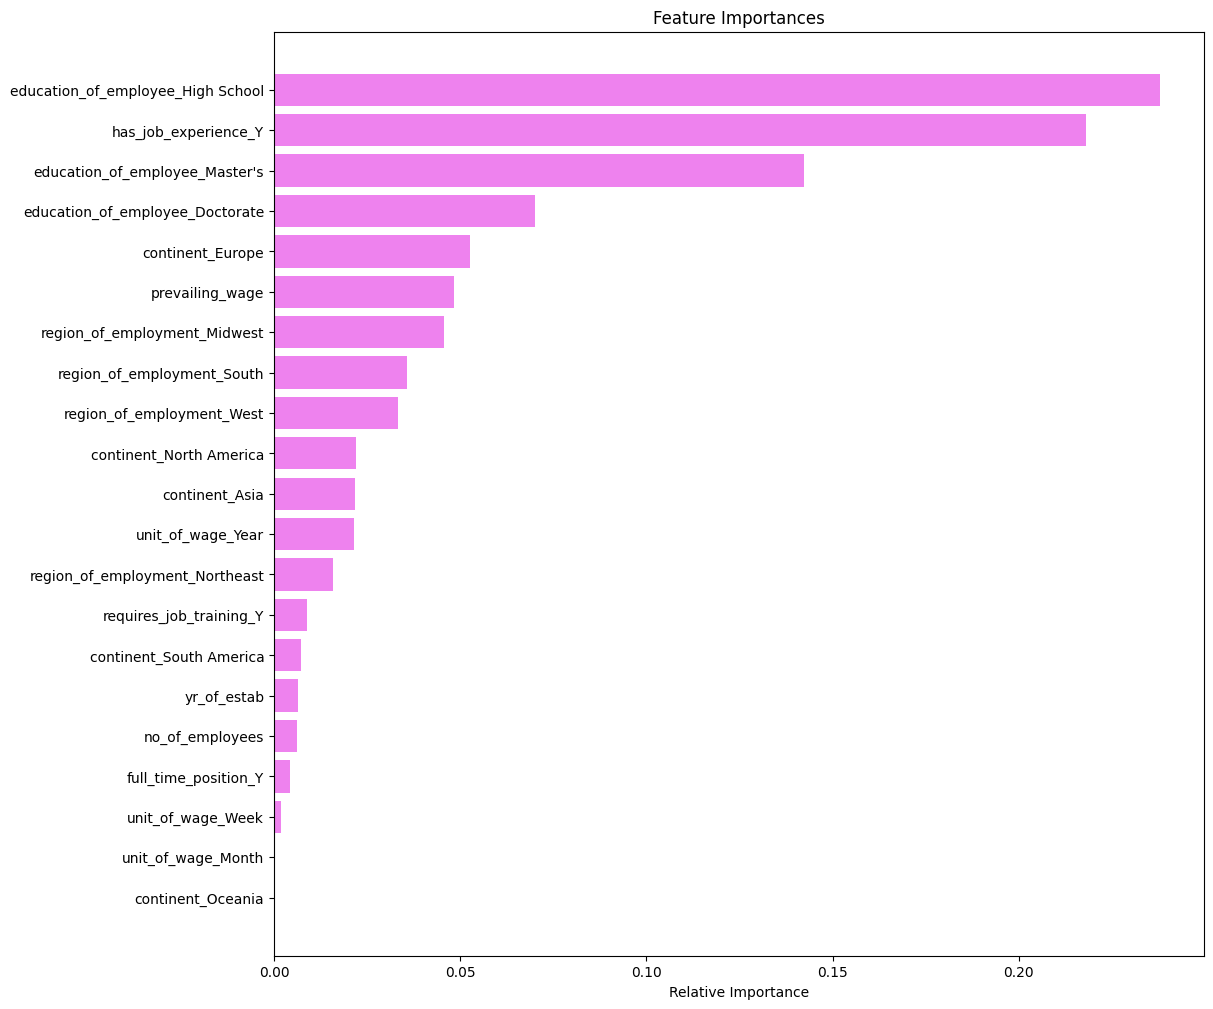

In [113]:
feature_names = x_train.columns
importances = tuned_gbm_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that education of the employee and has job experience are the most important features for making predictions

# Buiness Insights and recommendations

Based on the selected model i.e Tuned Gradient Boost following recommendations and insights can be obtained :-

**Insights for Certifying the visa application:**

1. Education Level - Atleast Bachelor's is preferred

2. Job Experience - should have job experience

3. COntinent - Applicant should be from Europe.

**Insights for Denying the visa application:**

1. Education Level - High School.

2. Job Experience - not having job experience.

3. Continent - Applicant should not be from South America, North America, Oceania.


**Additional information based on which better insights can be obtained:**

1. Education Level - Post Graduation skills can be analyzed further as specialiation in a particular field can impac visa certified or denied status.

2. Also Years in Job Experience and Industry Experience can be analyzed further.

3. Europe has many countries which can be analyzed further from which countries the approval rate is the highest.

# **Note : XGBoost model have build and tuned only for the learning purpose**